CIFAR 10 DATASET

A dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

Label	Description

0 : airplane

1 : automobile

2 : bird

3 : cat

4 : deer

5 : dog

6 : frog

7 : horse

8 : ship

9 : truck


import required libraries 

In [5]:
import numpy as np
import tensorflow
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 
from keras.datasets import cifar10

Get the dataset

In [6]:
NUM_CLASSES = 10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [9]:
x_train[54, 12, 13, 1] 

0.36862746

# Building the model

In [14]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [15]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0   

# Training the model

In [21]:
# optimizer and compilation
opt = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [34]:
model.fit(x_train
          , y_train
          , batch_size=255
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
197/197 [==============================] - 142s 720ms/step - loss: 0.6343 - accuracy: 0.7749 - val_loss: 0.8091 - val_accuracy: 0.7216
Epoch 2/10
197/197 [==============================] - 144s 733ms/step - loss: 0.6275 - accuracy: 0.7772 - val_loss: 0.8081 - val_accuracy: 0.7238
Epoch 3/10
197/197 [==============================] - 143s 727ms/step - loss: 0.6181 - accuracy: 0.7795 - val_loss: 0.8272 - val_accuracy: 0.7155
Epoch 4/10
197/197 [==============================] - 144s 730ms/step - loss: 0.6124 - accuracy: 0.7822 - val_loss: 0.8309 - val_accuracy: 0.7187
Epoch 5/10
197/197 [==============================] - 145s 735ms/step - loss: 0.6087 - accuracy: 0.7839 - val_loss: 0.8257 - val_accuracy: 0.7216
Epoch 6/10
197/197 [==============================] - 143s 727ms/step - loss: 0.6053 - accuracy: 0.7861 - val_loss: 0.8357 - val_accuracy: 0.7211
Epoch 7/10
197/197 [==============================] - 143s 727ms/step - loss: 0.5969 - accuracy: 0.7863 - val_loss: 0.8445 -

In [45]:
model.layers[6].get_weights()

[]

#Evaluating the model

In [38]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 7s 708ms/step - loss: 0.8305 - accuracy: 0.7223


[0.83054518699646, 0.7222999930381775]

In [39]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

Visualize the results

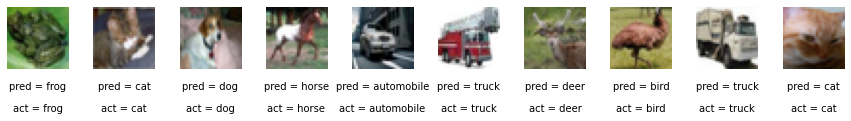

In [44]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


Save the model 

In [46]:
model.save('./CIFAR10CNN')

INFO:tensorflow:Assets written to: ./CIFAR10CNN/assets


Load the model

In [48]:
import keras
model_reconstructed = keras.models.load_model("CIFAR10CNN")

In [49]:
!zip -r /content/file.zip /content/CIFAR10CNN

  adding: content/CIFAR10CNN/ (stored 0%)
  adding: content/CIFAR10CNN/keras_metadata.pb (deflated 93%)
  adding: content/CIFAR10CNN/assets/ (stored 0%)
  adding: content/CIFAR10CNN/saved_model.pb (deflated 90%)
  adding: content/CIFAR10CNN/variables/ (stored 0%)
  adding: content/CIFAR10CNN/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/CIFAR10CNN/variables/variables.index (deflated 73%)
